# [ORIE 4741] Final Project Report

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc

In [2]:
yelp_business = pd.read_json('yelp_business.json', lines=True)

In [3]:
yelp_business['attributes']

0                             {'ByAppointmentOnly': 'True'}
1                    {'BusinessAcceptsCreditCards': 'True'}
2         {'BikeParking': 'True', 'BusinessAcceptsCredit...
3         {'RestaurantsDelivery': 'False', 'OutdoorSeati...
4         {'BusinessAcceptsCreditCards': 'True', 'Wheelc...
                                ...                        
150341    {'ByAppointmentOnly': 'False', 'RestaurantsPri...
150342    {'BusinessAcceptsCreditCards': 'True', 'Restau...
150343    {'RestaurantsPriceRange2': '1', 'BusinessAccep...
150344    {'BusinessParking': '{'garage': False, 'street...
150345    {'WheelchairAccessible': 'True', 'BusinessAcce...
Name: attributes, Length: 150346, dtype: object

In [4]:
yelp_business['attributes'].unique

<bound method Series.unique of 0                             {'ByAppointmentOnly': 'True'}
1                    {'BusinessAcceptsCreditCards': 'True'}
2         {'BikeParking': 'True', 'BusinessAcceptsCredit...
3         {'RestaurantsDelivery': 'False', 'OutdoorSeati...
4         {'BusinessAcceptsCreditCards': 'True', 'Wheelc...
                                ...                        
150341    {'ByAppointmentOnly': 'False', 'RestaurantsPri...
150342    {'BusinessAcceptsCreditCards': 'True', 'Restau...
150343    {'RestaurantsPriceRange2': '1', 'BusinessAccep...
150344    {'BusinessParking': '{'garage': False, 'street...
150345    {'WheelchairAccessible': 'True', 'BusinessAcce...
Name: attributes, Length: 150346, dtype: object>

In [5]:
yelp_business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


## EDA

In [6]:
# response variable 
yelp_business['is_open']

0         0
1         1
2         0
3         1
4         1
         ..
150341    1
150342    1
150343    1
150344    1
150345    1
Name: is_open, Length: 150346, dtype: int64

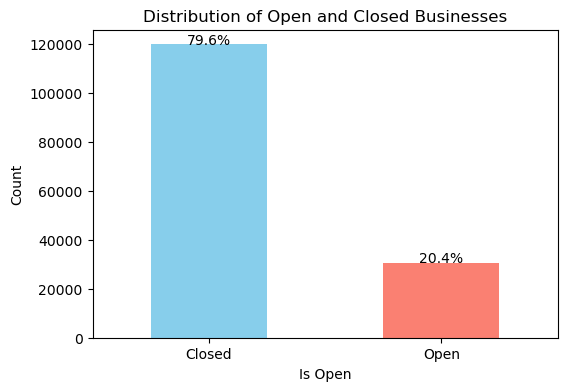

In [7]:
is_open_counts = yelp_business['is_open'].value_counts()
total = is_open_counts.sum()

plt.figure(figsize=(6, 4))
ax = is_open_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Open and Closed Businesses')
plt.xlabel('Is Open')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Closed', 'Open'], rotation=0)

for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width() / 2, height + 5, f'{height / total:.1%}', ha='center')

plt.show()

There are more closed businesses than open businesses in our dataset. However, since we want to implement a random forest, made up of multiple decision trees, we can proceed with our imbalanced class response because our random forest will learn to prioritize splits that separate the minority class (Chen et al. 2004). One key feature of random forests uses bootstrap sampling to create multiple subsets of the data for each tree. This sampling technique can help balance the classes in each subset, especially if the minority class is represented in at least some of the subsets. By considering only a subset of features at each split, this can help prevent the majority class from dominating the splits and allow the model to focus on features that are more informative for both classes. 

In [8]:
yelp_business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

### Stars

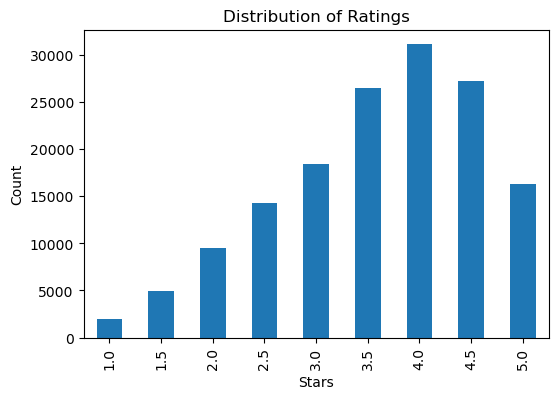

In [9]:
just_stars = yelp_business['stars'].value_counts()
plt.figure(figsize=(6, 4))
just_stars_sorted = just_stars.sort_index()
just_stars_sorted.plot(kind='bar')
plt.title('Distribution of Ratings')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()

### Number of Reviews

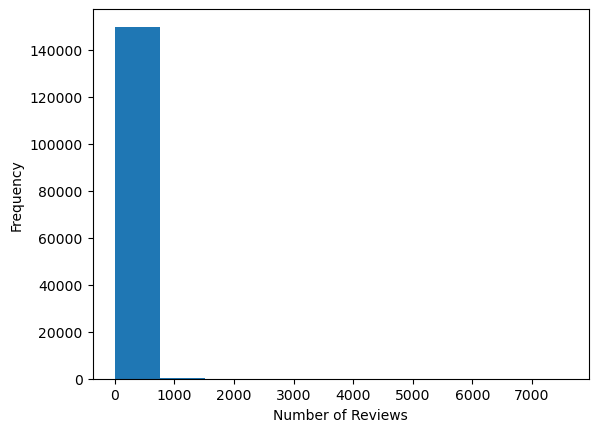

In [10]:
plt.hist(yelp_business['review_count']);
plt.xlabel('Number of Reviews');
plt.ylabel('Frequency');

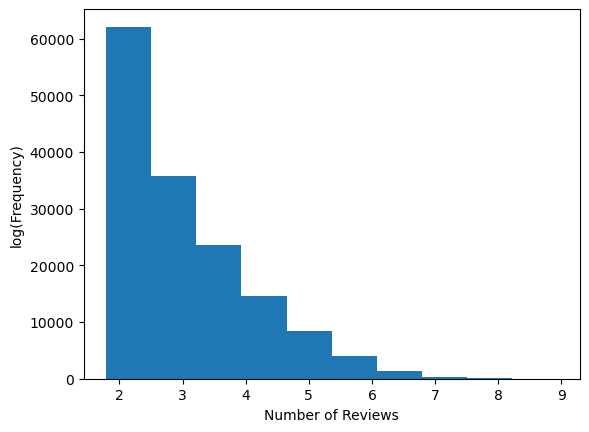

In [11]:
plt.hist(yelp_business['review_count'].apply(np.log1p));
plt.xlabel('Number of Reviews');
plt.ylabel('log(Frequency)');

In [12]:
# look at the outlier
yelp_business.loc[yelp_business['review_count'].idxmax()]

business_id                                _ab50qdWOk0DdB6XOrBitw
name                                            Acme Oyster House
address                                          724 Iberville St
city                                                  New Orleans
state                                                          LA
postal_code                                                 70130
latitude                                                29.954273
longitude                                              -90.068965
stars                                                         4.0
review_count                                                 7568
is_open                                                         1
attributes      {'RestaurantsTakeOut': 'True', 'Alcohol': ''fu...
categories      Live/Raw Food, Seafood, Restaurants, Cajun/Creole
hours           {'Monday': '11:0-22:0', 'Thursday': '11:0-22:0...
Name: 113731, dtype: object

In [13]:
yelp_business[yelp_business['review_count'] > 5000]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
31033,VQcCL9PiNL_wkGf-uF3fjg,Royal House,441 Royal St,New Orleans,LA,70130,29.956473,-90.066386,4.0,5070,1,"{'WiFi': 'u'free'', 'Caters': 'False', 'Outdoo...","American (New), Restaurants, Sandwiches, Seafo...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
91757,GXFMD0Z4jEVZBCsbPf4CTQ,Hattie B’s Hot Chicken - Nashville,112 19th Ave S,Nashville,TN,37203,36.151387,-86.796603,4.5,6093,1,"{'RestaurantsGoodForGroups': 'True', 'Business...","American (Traditional), Chicken Shop, Southern...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-16:0', ..."
100024,iSRTaT9WngzB8JJ2YKJUig,Mother's Restaurant,401 Poydras St,New Orleans,LA,70130,29.949057,-90.067049,3.5,5185,1,"{'RestaurantsGoodForGroups': 'True', 'BYOBCork...","Cajun/Creole, Restaurants, Event Planning & Se...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-17:0', '..."
112552,ac1AeYqs8Z4_e2X5M3if2A,Oceana Grill,739 Conti St,New Orleans,LA,70130,29.956231,-90.067563,4.0,7400,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Restaurants, Seafood, Cajun/Creole, Breakfast ...","{'Monday': '8:0-1:0', 'Tuesday': '8:0-1:0', 'W..."
113731,_ab50qdWOk0DdB6XOrBitw,Acme Oyster House,724 Iberville St,New Orleans,LA,70130,29.954273,-90.068965,4.0,7568,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': ''fu...","Live/Raw Food, Seafood, Restaurants, Cajun/Creole","{'Monday': '11:0-22:0', 'Thursday': '11:0-22:0..."
143157,ytynqOUb3hjKeJfRj5Tshw,Reading Terminal Market,51 N 12th St,Philadelphia,PA,19107,39.953341,-75.158855,4.5,5721,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Candy Stores, Shopping, Department Stores, Fas...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ..."
147081,oBNrLz4EDhiscSlbOl8uAw,Ruby Slipper - New Orleans,200 Magazine St,New Orleans,LA,70130,29.951025,-90.067394,4.5,5193,1,"{'NoiseLevel': ''loud'', 'Caters': 'False', 'B...","Restaurants, American (Traditional), American ...","{'Monday': '0:0-0:0', 'Tuesday': '7:30-14:0', ..."


## *Feature Engineering*

In [14]:
yelp_business['log_review_count'] = yelp_business['review_count'].apply(np.log1p)

## Data Cleaning

### Categories
Is the choice to operate in the food industry more important in predicting the closure of a business?

In [15]:
# Calculate the percentage of missing values
missing_percent = yelp_business.isnull().sum() / len(yelp_business) * 100

# Print the results
print("Percentage of Missing Values:\n", missing_percent)

Percentage of Missing Values:
 business_id          0.000000
name                 0.000000
address              0.000000
city                 0.000000
state                0.000000
postal_code          0.000000
latitude             0.000000
longitude            0.000000
stars                0.000000
review_count         0.000000
is_open              0.000000
attributes           9.141580
categories           0.068509
hours               15.446370
log_review_count     0.000000
dtype: float64


In [16]:
yelp_business = yelp_business[yelp_business['categories'].notna()]

In [17]:
# this list was derived from https://blog.yelp.com/businesses/yelp_category_list/
# all keywords searched for come from the 'Food' or 'Restaurants' tab
food_categories = [
    'Food', 'Acai Bowls', 'Backshop', 'Bagels', 'Bakeries', 'Beer, Wine & Spirits', 'Bento', 'Beverage Store', 
    'Breweries', 'Brewpubs', 'Bubble Tea', 'Butcher', 'Chimney Cakes', 'Churros', 'Cideries', 'Coffee & Tea', 
    'Coffee & Tea Supplies', 'Coffee Roasteries', 'Convenience Stores', 'CSA', 'Cupcakes', 'Custom Cakes', 
    'Delicatessen', 'Desserts', 'Distilleries', 'Do-It-Yourself Food', 'Donairs', 'Donuts', 'Empanadas', 
    'Ethical Grocery', 'Farmers Market', 'Fishmonger', 'Food Delivery Services', 'Food Trucks', 'Friterie', 
    'Gelato', 'Grocery', 'Hawker Centre', 'Honey', 'Ice Cream & Frozen Yogurt', 'Imported Food', 
    'International Grocery', 'Internet Cafes', 'Japanese Sweets', 'Taiyaki', 'Juice Bars & Smoothies', 'Kiosk', 
    'Kombucha', 'Meaderies', 'Milkshake Bars', 'Mulled Wine', 'Nasi Lemak', 'Organic Stores', 'Panzerotti', 
    'Parent Cafes', 'Patisserie/Cake Shop', 'Piadina', 'Poke', 'Pretzels', 'Salumerie', 'Shaved Ice', 
    'Shaved Snow', 'Smokehouse', 'Specialty Food', 'Candy Stores', 'Cheese Shops', 'Chocolatiers & Shops', 
    'Dagashi', 'Dried Fruit', 'Frozen Food', 'Fruits & Veggies', 'Health Markets', 'Herbs & Spices', 'Macarons', 
    'Meat Shops', 'Olive Oil', 'Pasta Shops', 'Popcorn Shops', 'Seafood Markets', 'Tofu Shops', 'Street Vendors', 
    'Sugar Shacks', 'Tea Rooms', 'Torshi', 'Tortillas', 'Water Stores', 'Wineries', 'Zapiekanka',
    'Afghan', 'African', 'Senegalese', 'South African', 'American (New)', 'American (Traditional)', 'Andalusian', 
    'Arabian', 'Arab Pizza', 'Argentine', 'Armenian', 'Asian Fusion', 'Asturian', 'Australian', 'Austrian', 
    'Baguettes', 'Bangladeshi', 'Barbeque', 'Basque', 'Bavarian', 'Beer Garden', 'Beer Hall', 'Beisl', 
    'Belgian', 'Flemish', 'Bistros', 'Black Sea', 'Brasseries', 'Brazilian', 'Brazilian Empanadas', 
    'Central Brazilian', 'Northeastern Brazilian', 'Northern Brazilian', 'Rodizios', 'Breakfast & Brunch', 
    'Pancakes', 'British', 'Buffets', 'Bulgarian', 'Burgers', 'Burmese', 'Cafes', 'Themed Cafes', 'Cafeteria', 
    'Cajun/Creole', 'Cambodian', 'Canadian (New)', 'Canteen', 'Caribbean', 'Dominican', 'Haitian', 
    'Puerto Rican', 'Trinidadian', 'Catalan', 'Cheesesteaks', 'Chicken Shop', 'Chicken Wings', 'Chilean', 
    'Chinese', 'Cantonese', 'Congee', 'Dim Sum', 'Fuzhou', 'Hainan', 'Hakka', 'Henghwa', 'Hokkien', 'Hunan', 
    'Pekinese', 'Shanghainese', 'Szechuan', 'Teochew', 'Comfort Food', 'Corsican', 'Creperies', 'Cuban', 
    'Curry Sausage', 'Cypriot', 'Czech', 'Czech/Slovakian', 'Danish', 'Delis', 'Diners', 'Dinner Theater', 
    'Dumplings', 'Eastern European', 'Eritrean', 'Ethiopian', 'Fast Food', 'Filipino', 'Fischbroetchen', 
    'Fish & Chips', 'Flatbread', 'Fondue', 'Food Court', 'Food Stands', 'Freiduria', 'French', 'Alsatian', 
    'Auvergnat', 'Berrichon', 'Bourguignon', 'Mauritius', 'Nicoise', 'Provencal', 'Reunion', 'French Southwest', 
    'Galician', 'Game Meat', 'Gastropubs', 'Georgian', 'German', 'Baden', 'Eastern German', 'Franconian', 
    'Hessian', 'Northern German', 'Palatine', 'Rhinelandian', 'Giblets', 'Gluten-Free', 'Greek', 'Guamanian', 
    'Halal', 'Hawaiian', 'Heuriger', 'Himalayan/Nepalese', 'Honduran', 'Hong Kong Style Cafe', 'Hot Dogs', 
    'Hot Pot', 'Hungarian', 'Iberian', 'Indian', 'Indonesian', 'International', 'Irish', 'Island Pub', 'Israeli', 
    'Italian', 'Abruzzese', 'Altoatesine', 'Apulian', 'Calabrian', 'Cucina Campana', 'Emilian', 'Friulan', 
    'Ligurian', 'Lumbard', 'Napoletana', 'Piemonte', 'Roman', 'Sardinian', 'Sicilian', 'Tuscan', 'Venetian', 
    'Japanese', 'Blowfish', 'Conveyor Belt Sushi', 'Donburi', 'Gyudon', 'Oyakodon', 'Hand Rolls', 'Horumon', 
    'Izakaya', 'Japanese Curry', 'Kaiseki', 'Kushikatsu', 'Oden', 'Okinawan', 'Okonomiyaki', 'Onigiri', 'Ramen', 
    'Robatayaki', 'Soba', 'Sukiyaki', 'Takoyaki', 'Tempura', 'Teppanyaki', 'Tonkatsu', 'Udon', 'Unagi', 
    'Western Style Japanese Food', 'Yakiniku', 'Yakitori', 'Jewish', 'Kebab', 'Kopitiam', 'Korean', 'Kosher', 
    'Kurdish', 'Laos', 'Laotian', 'Latin American', 'Colombian', 'Salvadoran', 'Venezuelan', 'Live/Raw Food', 
    'Lyonnais', 'Malaysian', 'Mamak', 'Nyonya', 'Meatballs', 'Mediterranean', 'Falafel', 'Mexican', 
    'Eastern Mexican', 'Jaliscan', 'Northern Mexican', 'Oaxacan', 'Pueblan', 'Tacos', 'Tamales', 'Yucatan', 
    'Middle Eastern', 'Egyptian', 'Lebanese', 'Milk Bars', 'Modern Australian', 'Modern European', 'Mongolian', 
    'Moroccan', 'New Mexican Cuisine', 'New Zealand', 'Nicaraguan', 'Night Food', 'Nikkei', 'Noodles', 
    'Norcinerie', 'Open Sandwiches', 'Oriental', 'Pakistani', 'Pan Asian', 'Parent Cafes', 'Parma', 
    'Persian/Iranian', 'Peruvian', 'PF/Comercial', 'Pita', 'Pizza', 'Polish', 'Pierogis', 'Polynesian', 
    'Pop-Up Restaurants', 'Portuguese', 'Alentejo', 'Algarve', 'Azores', 'Beira', 'Fado Houses', 'Madeira', 
    'Minho', 'Ribatejo', 'Tras-os-Montes', 'Potatoes', 'Poutineries', 'Pub Food', 'Rice', 'Romanian', 
    'Rotisserie Chicken', 'Russian', 'Salad', 'Sandwiches', 'Scandinavian', 'Schnitzel', 'Scottish', 
    'Seafood', 'Serbo Croatian', 'Signature Cuisine', 'Singaporean', 'Slovakian', 'Somali', 'Soul Food', 
    'Soup', 'Southern', 'Spanish', 'Arroceria/Paella', 'Sri Lankan', 'Steakhouses', 'Supper Clubs', 
    'Sushi Bars', 'Swabian', 'Swedish', 'Swiss Food', 'Syrian', 'Tabernas', 'Taiwanese', 'Tapas Bars', 
    'Tapas/Small Plates', 'Tavola Calda', 'Tex-Mex', 'Thai', 'Traditional Norwegian', 'Traditional Swedish', 
    'Trattorie', 'Turkish', 'Chee Kufta', 'Gozleme', 'Homemade Food', 'Lahmacun', 'Ottoman Cuisine', 
    'Turkish Ravioli', 'Ukrainian', 'Uzbek', 'Vegan', 'Vegetarian', 'Venison', 'Vietnamese', 'Waffles', 
    'Wok', 'Wraps', 'Yugoslav'
]

yelp_business['FoodIndustry'] = yelp_business['categories'].apply(lambda x: any(category in x for category in food_categories))

print(yelp_business[['categories', 'FoodIndustry']].head())

                                          categories  FoodIndustry
0  Doctors, Traditional Chinese Medicine, Naturop...          True
1  Shipping Centers, Local Services, Notaries, Ma...         False
2  Department Stores, Shopping, Fashion, Home & G...         False
3  Restaurants, Food, Bubble Tea, Coffee & Tea, B...          True
4                          Brewpubs, Breweries, Food          True


/var/folders/5w/7dtpzt3x0q12z6w8x_hv52rh0000gn/T/ipykernel_14215/35454718.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_business['FoodIndustry'] = yelp_business['categories'].apply(lambda x: any(category in x for category in food_categories))


### Hours

To predict the closure of a business, we would like to see if opening the business for more days in a week increases the chances of it staying in business. We use the `hours` column to engineer this new feature. Since the data is currently structured as a dictionary that does not contain opening hour information on days when a business is closed, we sum the number of keys it has based on the below code.

In [18]:
# drop missing values so that it doesn't throw errors every five seconds
yelp_business = yelp_business[yelp_business['hours'].notna()]
yelp_business['hours']

1         {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...
2         {'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...
3         {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...
4         {'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...
5         {'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...
                                ...                        
150340    {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...
150341    {'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3...
150342    {'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3...
150344    {'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ...
150345    {'Tuesday': '12:0-19:0', 'Wednesday': '12:0-19...
Name: hours, Length: 127123, dtype: object

## *Feature Engineering*

In [19]:
def count_open_days_in_week(hours_dict):
    days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    return sum(day in hours_dict.keys() for day in days_of_week)

yelp_business['OpenDaysCount'] = yelp_business['hours'].apply(count_open_days_in_week)

### Location

In [20]:
len(yelp_business['city'].unique())

1329

Our random forest algorithm would run into challenging run times if we were to proceed in not processing the `city` feature due to its high cardinality (~1300 unique values). Instead, we choose to create a new column of clusters for the dataset based on location-relevant information. 

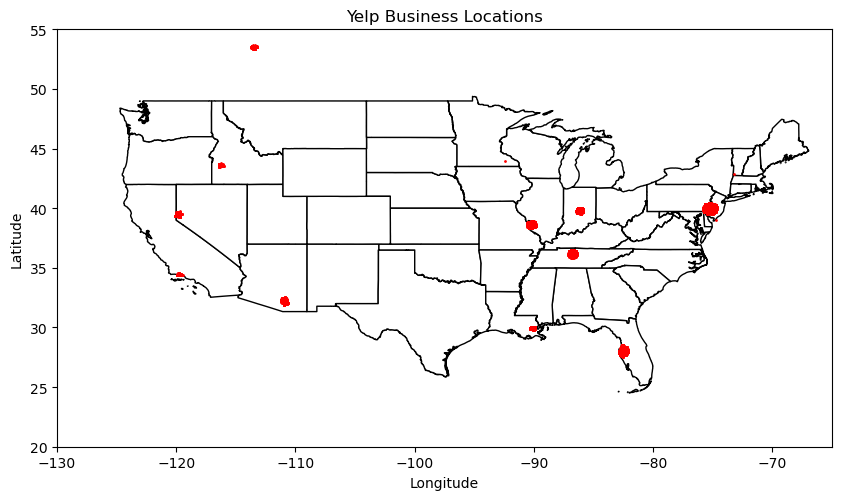

In [21]:
gdf = gpd.GeoDataFrame(yelp_business, geometry=gpd.points_from_xy(yelp_business['longitude'], yelp_business['latitude']))

# Load the US map shapefile
us_map = gpd.read_file('data/cb_2018_us_state_5m.shp')

# Plot the US map
ax = us_map.plot(color='white', edgecolor='black', figsize=(10, 6))

# Plot the points on top of the map
gdf.plot(ax=ax, color='red', markersize=1)

plt.xlim(-130, -65)
plt.ylim(20, 55)
plt.title("Yelp Business Locations")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## *Feature Engineering*

In [22]:
X = yelp_business[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=11, random_state=42)
yelp_business['city_cluster'] = kmeans.fit_predict(X)

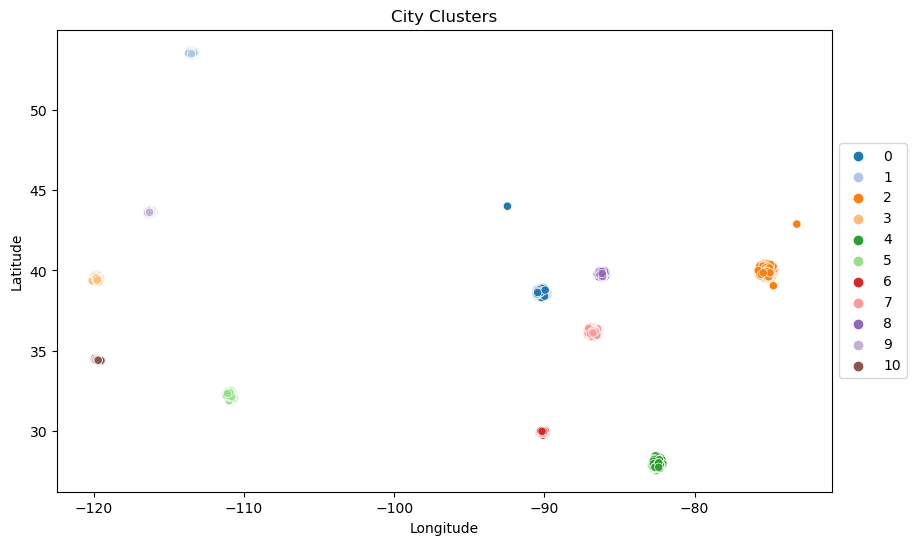

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='city_cluster', data=yelp_business, palette='tab20', legend='full')
plt.title('City Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Based on the graph above, we see that that the data clusters nicely for the majority of the data sans the two big clusters with longitudes near -80.

In [24]:
# these are the clusters belonging to colors we are sure of, so we will just take the most recurring city and designate that
for i in range(11):
    print("Cluster Label: " + str(i))
    print(yelp_business.loc[yelp_business['city_cluster'] == i, ['city', 'state']].mode())

Cluster Label: 0
          city state
0  Saint Louis    MO
Cluster Label: 1
       city state
0  Edmonton    AB
Cluster Label: 2
           city state
0  Philadelphia    PA
Cluster Label: 3
   city state
0  Reno    NV
Cluster Label: 4
    city state
0  Tampa    FL
Cluster Label: 5
     city state
0  Tucson    AZ
Cluster Label: 6
          city state
0  New Orleans    LA
Cluster Label: 7
        city state
0  Nashville    TN
Cluster Label: 8
           city state
0  Indianapolis    IN
Cluster Label: 9
    city state
0  Boise    ID
Cluster Label: 10
            city state
0  Santa Barbara    CA


**Let's look at cluster A (labels 8 and 15):**

In [25]:
yelp_business.loc[yelp_business['city_cluster'] == 8].head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,log_review_count,FoodIndustry,OpenDaysCount,city_cluster
12,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",3.367296,True,7,8
21,qhDdDeI3K4jy2KyzwFN53w,Barnes & Noble Booksellers,8675 River Crossing Blvd,Indianapolis,IN,46240,39.913820,-86.105739,4.0,38,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Shopping, Books, Mags, Music & Video, Bookstores","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",3.663562,False,7,8
22,kfNv-JZpuN6TVNSO6hHdkw,Hibachi Express,6625 E 82nd St,Indianapolis,IN,46250,39.904320,-86.053080,4.0,20,1,"{'RestaurantsDelivery': 'True', 'RestaurantsTa...","Steakhouses, Asian Fusion, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",3.044522,True,6,8
40,x1mhq4IpWctQOBM06dU8vg,Diamond Hair Company,5324 W 16th St,Indianapolis,IN,46224,39.787464,-86.251421,1.5,25,1,{'RestaurantsPriceRange2': '2'},"Hair Salons, Hair Extensions, Beauty & Spas, W...","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...",3.258097,False,7,8
61,seKihQKpGGnCeLuELRQPSQ,Twin Peaks,6880 E 82nd St,Indianapolis,IN,46250,39.906295,-86.047463,3.5,257,1,"{'CoatCheck': 'False', 'Music': '{'dj': False}...","Sports Bars, American (New), American (Traditi...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', '...",5.552960,True,7,8


In [26]:
yelp_business.loc[yelp_business['city_cluster'] == 15].head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,log_review_count,FoodIndustry,OpenDaysCount,city_cluster


Looks like it's just Indianapolis, Indiana so we will assign 8 and 15 belonging to that geographic region.

**Let's look at cluster B (labels 4, 13, 19):**

In [27]:
print(yelp_business.loc[yelp_business['city_cluster'] == 4][['city', 'state']].mode())
print(yelp_business.loc[yelp_business['city_cluster'] == 13][['city', 'state']].mode())
print(yelp_business.loc[yelp_business['city_cluster'] == 19][['city', 'state']].mode())

    city state
0  Tampa    FL
Empty DataFrame
Columns: [city, state]
Index: []
Empty DataFrame
Columns: [city, state]
Index: []


Tampa, Clearwater, and Saint Petersburg are all Florida cities located within the similar geographic region, so we will just assign those labels as Tampa. 

**Let's look at cluster C (labels 11, 12, 14, 16, 18):**

In [28]:
print(yelp_business.loc[yelp_business['city_cluster'] == 11][['city', 'state']].mode())
print(yelp_business.loc[yelp_business['city_cluster'] == 12][['city', 'state']].mode())
print(yelp_business.loc[yelp_business['city_cluster'] == 14][['city', 'state']].mode())
print(yelp_business.loc[yelp_business['city_cluster'] == 16][['city', 'state']].mode())
print(yelp_business.loc[yelp_business['city_cluster'] == 18][['city', 'state']].mode())

Empty DataFrame
Columns: [city, state]
Index: []
Empty DataFrame
Columns: [city, state]
Index: []
Empty DataFrame
Columns: [city, state]
Index: []
Empty DataFrame
Columns: [city, state]
Index: []
Empty DataFrame
Columns: [city, state]
Index: []


These cities are all within an hour of each other, therefore we will deem these labels in cluster C belonging to Philadelphia.

| Cluster Label | City | State |
| --- | --- | --- |
| 0 | Philadelphia | PA |
| 1 | Reno | NV |
| 2 | New Orleans | LA |
| 3 | Nashville | TN |
| 4 | Tampa | FL |
| 5 | Edmonton | AB |
| 6 | Tucson | AZ |
| 7 | Saint Louis | MO |
| 8 | Indianapolis | IN |
| 9 | Santa Barbara | CA |
| 10 | Boise | ID |
| 11 | Philadelphia | PA |

## Model Building 

So to summarize, we will use the following variables for our random forest classification.

**Response variable:** 
`yelp_business['is_open]`

**Predictors:** 
- `city_cluster`: Obtained through KMeans clustering of 20 clusters using `latitude` and `longitude`. The table above describes the general location of each label. 
- `OpenDaysCount`: Number of days open a the week, based on the `hours` column. 
- `FoodIndustry`: binary variable based off of the `categories` feature, 1 for is in the restaurant/food industry, 0 otherwise
- `log_review_count`: log transformed `review_count` which counts the number of reviews a business has.
- `stars`: 1-5 scale, 0.5 steps

In [29]:
# Define the predictors and response variable
X = yelp_business[['city_cluster', 'OpenDaysCount', 'FoodIndustry', 'log_review_count', 'stars']]
y = yelp_business['is_open']

# Split the data into training and test sets, 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7875319567354966


In [30]:
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='Gini Importance', ascending=False)
print(feature_importances_df)

            Feature  Gini Importance
3  log_review_count         0.597618
0      city_cluster         0.152615
2      FoodIndustry         0.096461
4             stars         0.092187
1     OpenDaysCount         0.061119


## Results
| Feature | Gini Importance |
| --- | --- |
| log_review_count | 0.574269 |
| city_cluster  | 0.202368 |
|  stars | 0.089509 |
| FoodIndustry | 0.076938 |
| OpenDaysCount | 0.056916 |

## Performance Metrics

Accuracy: 0.7875319567354966
ROC-AUC Score: 0.6308143298121713
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.15      0.21      4701
           1       0.83      0.93      0.88     20724

    accuracy                           0.79     25425
   macro avg       0.58      0.54      0.54     25425
weighted avg       0.74      0.79      0.75     25425

                  importance
log_review_count    0.597618
city_cluster        0.152615
FoodIndustry        0.096461
stars               0.092187
OpenDaysCount       0.061119


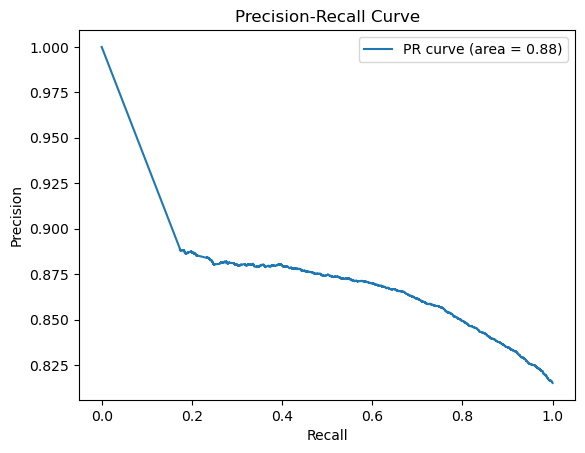

In [31]:
y_probs = rf_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)
print("Accuracy:", accuracy)
print("ROC-AUC Score:", roc_auc)
print("Classification Report:\n", classification_report(y_test, y_pred))

feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="best")
plt.show()

We can see with the graph above that the curve starts with a very high precision at the lowest levels of recall, meaning the model starts off really conservative. As recall increases, there is a sharp drop where the model lowers its threshold to classify more samples as positives which also captures more true positives. Moreover, it also captures more false positives which reduces precision. In the middle to the end of the curve, we see recall continues to increase and precision decreases slowly. Overall, an AUC of 0.88 indicates that the model has a high precision across all levels of recall and is generally reliable in positive predictions.

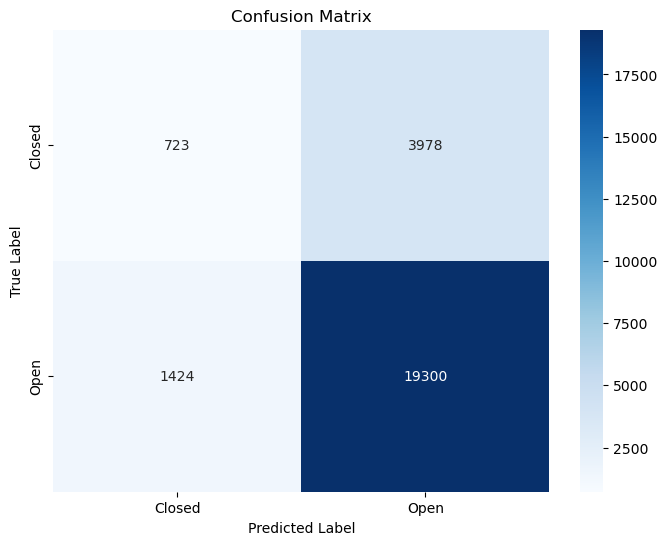

In [32]:
cm = confusion_matrix(y_test, y_pred)
labels = ['Closed', 'Open']  # Adjust labels accordingly

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Based on the confusion matrix above, we see that there is a significant issue with false positives where closed businesses are predicted open.The high true positives count and lower false negatives show the model is more efficient in identifying open businesses than closed businesses.

/var/folders/5w/7dtpzt3x0q12z6w8x_hv52rh0000gn/T/ipykernel_14215/3051672994.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = yelp_business.corr()


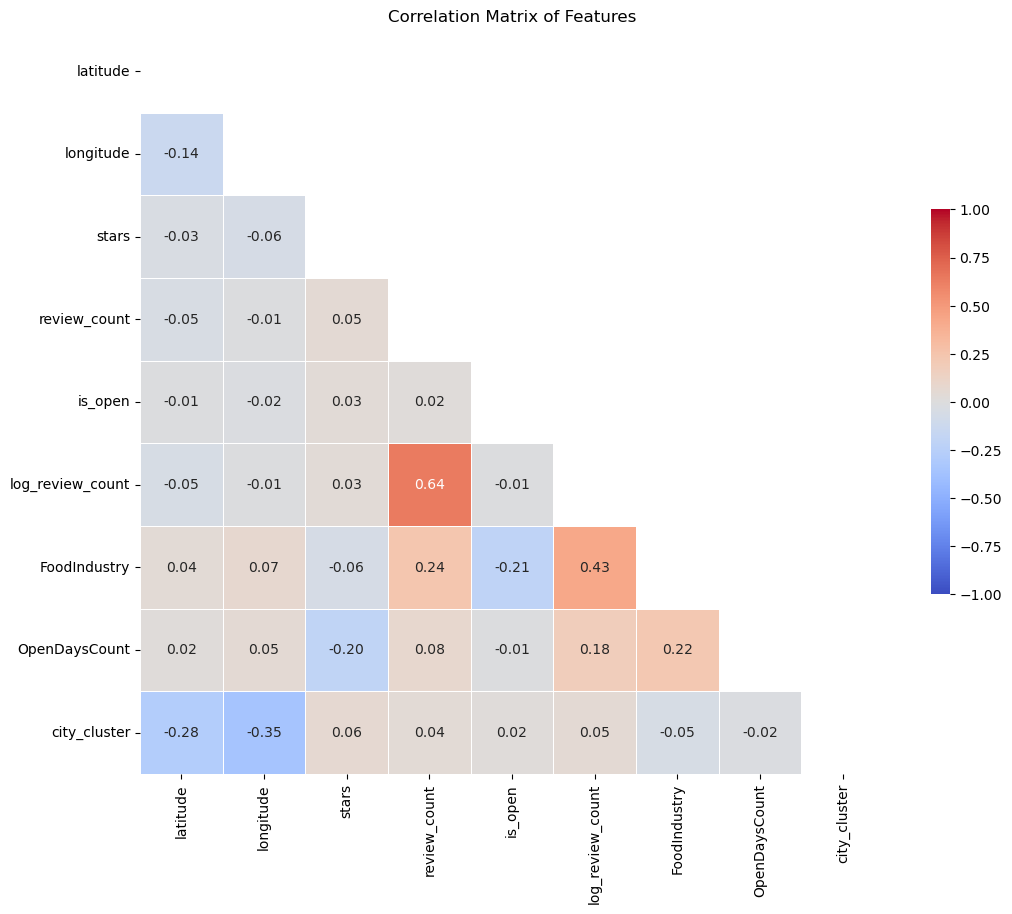

In [33]:
corr = yelp_business.corr()

plt.figure(figsize=(12, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            vmax=1.0, vmin=-1.0, center=0, square=True, linewidths=.5,
            cbar_kws={"shrink": .5})

plt.title('Correlation Matrix of Features')
plt.show()

The correlation matrix above depicts a strong positive correlation between log_review_count and is_open where businesses with more reviews are more likely to be open. A moderate positive correlation is explored indicating that businesses in the food industry tend be open more days per week where longer operating hours correlate with or allowing business owners to maximize their customer service. There are however a slight negative correlation with stars and food industry which might suggest that businesses in the food industry have lower ratings than other sectors of business. This could be because of the high customer expectations or greater competition within the food industry.

## Model Fairness Metrics

In [35]:
cm = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = cm.ravel()

TPR_open = TP / (TP + TN)

FPR_open = FP / (FP + TN)

TPR_closed = TN / (TN + FP)

FPR_closed = FN / (FN + TP)

print("Fairness Metrics:")
print(f"Equal Opportunity for open businesses (TPR): {TPR_open:.2f}")
print(f"Equal Opportunity for closed businesses (TPR): {TPR_closed:.2f}")
print(f"Predictive Equality for open businesses (FPR): {FPR_open:.2f}")
print(f"Predictive Equality for closed businesses (FPR): {FPR_closed:.2f}")

Fairness Metrics:
Equal Opportunity for open businesses (TPR): 0.96
Equal Opportunity for closed businesses (TPR): 0.15
Predictive Equality for open businesses (FPR): 0.85
Predictive Equality for closed businesses (FPR): 0.07


It can be seen above that model is signficantly better at identifying open businesses correctly than closed ones. The FPR for closed businesses is also very low. The model can be deemed as not fair due to the discrepancy between TPR and FPR.

In [36]:
TPR_ratio = 0.15 / 0.93
FPR_ratio = 0.07 / 0.85

equalized_odds_ratio = min(TPR_ratio, FPR_ratio)

print("TPR Ratio:", TPR_ratio)
print("FPR Ratio:", FPR_ratio)
print("Equalized Odds Ratio:", equalized_odds_ratio)

TPR Ratio: 0.16129032258064516
FPR Ratio: 0.0823529411764706
Equalized Odds Ratio: 0.0823529411764706


The ideal equalized odds ratio is 1 for a model to be perfectly fair. And, values between 0.8 and 1 are considered fair. It can be seen that the ratio is very low and can be considered unfair.